In [1]:
# データ解析、機械学習系
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化系
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline
%precision 3

'%.3f'

## Scipy

In [3]:
# Library of linear algebra
import scipy.linalg as linalg

In [8]:
matrix = np.array([[1, -1, -1], [-1, 1, -1], [-1, -1, 1]])
print(f'行列式 : {linalg.det(matrix)}')

行列式 : -4.0


In [10]:
inv_matrix = linalg.inv(matrix)
print(f'逆行列 :\n{inv_matrix}')
print(f'Dot積 : \n{ matrix.dot(inv_matrix) }')

逆行列 :
[[ 0.  -0.5 -0.5]
 [-0.5 -0.  -0.5]
 [-0.5 -0.5  0. ]]
Dot積 : 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [11]:
eig_value, eig_vector = linalg.eig(matrix)
print(f'固有値 : \n{eig_value}')
print(f'固有ベクトル : \n{eig_vector}')

固有値 : 
[-1.+0.j  2.+0.j  2.+0.j]
固有ベクトル : 
[[ 0.577 -0.816  0.428]
 [ 0.577  0.408 -0.816]
 [ 0.577  0.408  0.389]]


## ニュートン法

https://qiita.com/PlanetMeron/items/09d7eb204868e1a49f49

平たく言うと、不明な関数 f に対して、最小値（仮に 0 とする）を求める為に、

1. f の適当な位置（開始位置 x）の接線を作る
2. 接線が 0 となる地点の x2 を求める
3. f の x2 地点の接線を求める…

というループを行なって、特定ポイントの座標を計算しようと言う話。  
これ最急降下法とどっちが計算回数が…と思ったけど、こっちのが早いわ（汗

でも考え方から言って適用できる関数には限界がありそう。

In [12]:
# 求めたい関数
def my_function(x):
    return x**2 + 2*x + 1


# scipy にある関数ロード
from scipy.optimize import newton
print(newton(my_function, 0))

-0.9999999852953906


In [13]:
# 最小値を求めてみる
# (Minimum) optimization calculation library
from  scipy.optimize import minimize_scalar

print(minimize_scalar(my_function, method = 'Brent'))

     fun: 0.0
    nfev: 9
     nit: 4
 success: True
       x: -1.0000000000000002


ふとやってて思った、部分最適解に捕まったりしないのかなと。

In [20]:
from math import sin
def my_function(x):
    return x**2 / 20 + 3*x + sin(x)

print(minimize_scalar(my_function, method = 'Brent'))

     fun: -45.594753219481596
    nfev: 22
     nit: 14
 success: True
       x: -32.7120754862274


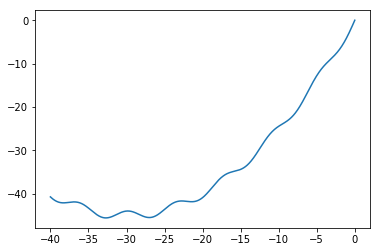

In [21]:
x = np.linspace(-40, 0, 800)
y = [my_function(n) for n in x]
plt.plot(x, y, label="test")

おー局所解にハマってない！

## 演習問題

In [23]:
# 1. 次の行列式を求めよ
A = np.array([
    [1, 2, 3],
    [1, 3, 2],
    [3, 1, 2]
])
print(f'行列式: \n{ linalg.det(A) }')

行列式: 
-12.000000000000002


In [24]:
# 2. 逆行列と固有値・固有ベクトルの取得
inv_matrix = linalg.inv(A)
eig_value, eig_vector = linalg.eig(A)
print(f'逆行列:\n{ inv_matrix }')
print(f'固有値:\n{ eig_value }')
print(f'固有ベクトル:\n{ eig_vector}')

逆行列:
[[-0.333  0.083  0.417]
 [-0.333  0.583 -0.083]
 [ 0.667 -0.417 -0.083]]
固有値:
[ 6.   +0.j -1.414+0.j  1.414+0.j]
固有ベクトル:
[[-0.577 -0.722  0.16 ]
 [-0.577 -0.143 -0.811]
 [-0.577  0.677  0.563]]


In [25]:
# 3. ニュートン法で 0 となる地点を探せ
def exercise(x):
    return x**3 + 2*x + 1
print(newton(exercise, 0))

-0.45339765151640365
